In [8]:
import os
import numpy as np
import librosa
import pandas as pd
from tqdm import tqdm

# Set parameters
SAMPLE_RATE = 22050
DURATION = 2  # seconds
MFCC_FEATURES = 13
DATASET_PATH = r"C:/Users/shiva/Downloads/Lang/Language Detection Dataset"
OUTPUT_CSV = "mfcc_features.csv"

# Function to extract MFCC
def extract_mfcc(file_path, sample_rate=SAMPLE_RATE, duration=DURATION, mfcc_features=MFCC_FEATURES):
    try:
        audio, sr = librosa.load(file_path, sr=sample_rate, duration=duration)
        if len(audio) < sample_rate * duration:
            padding = int(sample_rate * duration - len(audio))
            audio = np.pad(audio, (0, padding), 'constant')
        mfcc_feat = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=mfcc_features)
        mfcc_mean = np.mean(mfcc_feat.T, axis=0)
        return mfcc_mean
    except Exception as e:
        print(f"❌ Error processing {file_path}: {e}")
        return None

# Main script
data = []
labels = []

print(f"📂 Scanning dataset in {DATASET_PATH}...")

for language in os.listdir(DATASET_PATH):
    language_path = os.path.join(DATASET_PATH, language)
    if os.path.isdir(language_path):
        print(f"🔍 Processing language folder: {language}")
        files = os.listdir(language_path)
        for file in tqdm(files, desc=f"📁 {language}", unit="file"):
            file_path = os.path.join(language_path, file)
            mfcc_feat = extract_mfcc(file_path)
            if mfcc_feat is not None:
                data.append(mfcc_feat)
                labels.append(language)

# Save the features
if data:
    df = pd.DataFrame(data)
    df['label'] = labels
    df.to_csv(OUTPUT_CSV, index=False)
    print(f"\n✅ Saved features to {OUTPUT_CSV}")
    print(f"📊 Label Mapping: {dict((label, idx) for idx, label in enumerate(set(labels)))}")
else:
    print("⚠️ No features or labels to save. Check your dataset structure.")


📂 Scanning dataset in C:/Users/shiva/Downloads/Lang/Language Detection Dataset...
🔍 Processing language folder: Gujarati


📁 Gujarati:  11%|█         | 2882/26441 [00:28<04:11, 93.62file/s] 

❌ Error processing C:/Users/shiva/Downloads/Lang/Language Detection Dataset\Gujarati\12867.mp3: 


📁 Gujarati:  84%|████████▍ | 22202/26441 [08:55<02:26, 29.01file/s]

❌ Error processing C:/Users/shiva/Downloads/Lang/Language Detection Dataset\Gujarati\5774.mp3: 


📁 Gujarati: 100%|██████████| 26441/26441 [11:32<00:00, 38.15file/s]


🔍 Processing language folder: Hindi


📁 Hindi: 100%|██████████| 25462/25462 [14:49<00:00, 28.64file/s]


🔍 Processing language folder: Kannada


📁 Kannada: 100%|██████████| 22208/22208 [11:55<00:00, 31.05file/s]


🔍 Processing language folder: Marathi


📁 Marathi:  62%|██████▏   | 15671/25379 [08:47<04:24, 36.64file/s]

❌ Error processing C:/Users/shiva/Downloads/Lang/Language Detection Dataset\Marathi\24094.mp3: 


📁 Marathi: 100%|██████████| 25379/25379 [14:51<00:00, 28.46file/s]


🔍 Processing language folder: Punjabi


📁 Punjabi:   5%|▌         | 1400/26229 [00:58<18:16, 22.65file/s]

❌ Error processing C:/Users/shiva/Downloads/Lang/Language Detection Dataset\Punjabi\11254.mp3: 


📁 Punjabi:  75%|███████▍  | 19639/26229 [13:33<04:19, 25.37file/s]

❌ Error processing C:/Users/shiva/Downloads/Lang/Language Detection Dataset\Punjabi\4063.mp3: 


📁 Punjabi: 100%|██████████| 26229/26229 [18:06<00:00, 24.14file/s]


🔍 Processing language folder: Telugu


📁 Telugu: 100%|██████████| 23656/23656 [19:00<00:00, 20.74file/s]   



✅ Saved features to mfcc_features.csv
📊 Label Mapping: {'Gujarati': 0, 'Telugu': 1, 'Marathi': 2, 'Hindi': 3, 'Kannada': 4, 'Punjabi': 5}


✅ Model and LabelEncoder saved.
✅ Accuracy: 0.66

🔍 Classification Report:

              precision    recall  f1-score   support

    Gujarati       0.10      0.10      0.10      5288
       Hindi       0.94      0.99      0.96      5092
     Kannada       0.99      0.94      0.97      4442
     Marathi       0.96      0.96      0.96      5076
     Punjabi       0.10      0.10      0.10      5245
      Telugu       0.96      0.95      0.95      4731

    accuracy                           0.66     29874
   macro avg       0.67      0.67      0.67     29874
weighted avg       0.65      0.66      0.65     29874



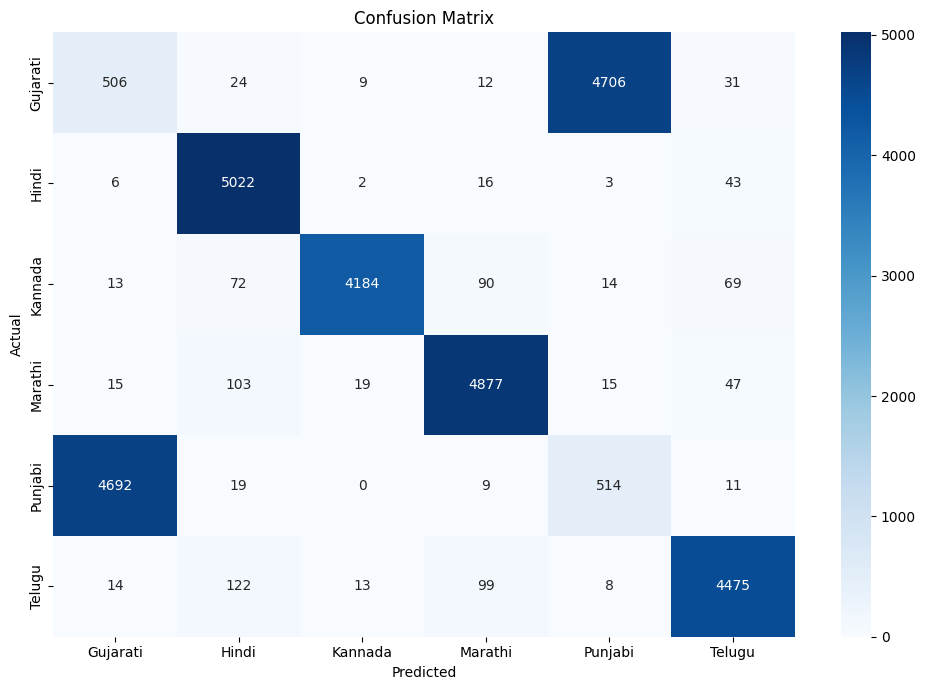

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("S:\Microsoft VS Code\mfcc_features.csv")

# Encode the 'label' column
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

# Features and target
X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

import joblib

joblib.dump(clf, "model.pkl")
joblib.dump(le, "label_encoder.pkl")

print("✅ Model and LabelEncoder saved.")


# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(f"✅ Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print("🔍 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


In [12]:
import numpy as np
import sounddevice as sd
from scipy.io.wavfile import write
import librosa
import joblib
from gtts import gTTS
import os
from googletrans import Translator

# Load trained model and encoder
model = joblib.load("model.pkl")
label_encoder = joblib.load("label_encoder.pkl")

# -----------------------
# 🎙 Record Audio
# -----------------------
def record_audio(filename="live_audio.wav", duration=5, fs=22050):
    print("🎙 Recording for", duration, "seconds...")
    audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    audio_int16 = np.int16(audio / np.max(np.abs(audio)) * 32767)
    write(filename, fs, audio_int16)
    print("✅ Recording saved:", filename)
    return filename

# -----------------------
# 🎚 Feature Extraction (MFCC)
# -----------------------
def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs_processed = np.mean(mfccs.T, axis=0)
    return mfccs_processed.reshape(1, -1)

# -----------------------
# 🧠 Predict Language
# -----------------------
def predict_language(audio_path):
    features = extract_features(audio_path)
    prediction = model.predict(features)[0]
    predicted_label = label_encoder.inverse_transform([prediction])[0]
    print(f"🧠 Predicted Language: {predicted_label}")
    return predicted_label

# -----------------------
# 🌍 Translate Text
# -----------------------
def translate_to_english(text, source_lang):
    translator = Translator()
    translated = translator.translate(text, src=source_lang, dest="en")
    print(f"📝 Translated: {translated.text}")
    return translated.text

# -----------------------
# 🔊 Speak the Output
# -----------------------
def speak(text):
    tts = gTTS(text)
    tts.save("output.mp3")
    os.system("start output.mp3" if os.name == "nt" else "afplay output.mp3")

# -----------------------
# 🔁 Main Translator
# -----------------------
def run_translator():
    input("🔘 Press Enter to start...")
    audio_file = record_audio(duration=50)
    lang_name = predict_language(audio_file)

    # Map to language codes for Google Translate
    lang_code_map = {
        "Hindi": "hi", "Telugu": "te", "Tamil": "ta", "Bengali": "bn",
        "Gujarati": "gu", "Marathi": "mr", "Kannada": "kn", "Urdu": "ur",
        "Odia": "or", "Punjabi": "pa"
    }
    src_code = lang_code_map.get(lang_name, "auto")

    # Simulate transcription (for now, ask user for input)
    print(f"💬 (Type what you said in {lang_name} for translation)")
    user_input = input("Your speech (text): ")

    translated_text = translate_to_english(user_input, src_code)
    speak(translated_text)
    print("✅ Done")

# Run it
run_translator()


🎙 Recording for 50 seconds...


C:\Users\shiva\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


✅ Recording saved: live_audio.wav
🧠 Predicted Language: Kannada
💬 (Type what you said in Kannada for translation)


TypeError: the JSON object must be str, bytes or bytearray, not NoneType